# RESOLUÇÃO DA SEMANA 9 DO ACELERADEV CODENATION

**Objetivo do desafio**: Prever quem é ou não participante treineiro com base em informações socioeconômicas e notas das provas do ENEM 2016.

**Metodologia**: Uso de modelos do tipo classificação.

# IMPORTANDO AS BIBLIOTECAS

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib notebook
import seaborn as sns

# IMPORTANDO OS DADOS

In [106]:
#base de treino
treino=pd.read_csv("train.csv")

#base de teste
teste=pd.read_csv('test.csv')

In [107]:
#vsializando a base de treino
treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [108]:
#Visualizando a base de teste
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [109]:
#colunas da base de treino
treino.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

In [110]:
#colunas da base de teste
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [111]:
#Vemos que as colunas da base de treino e de teste são diferentes, por esse motivo vamos definir o número de colunas do dataset
#de treino igual as colunas do dataset de teste, com a diferença que o de treino terá uma coluna a mais, que é 'IN_TREINEIRO'

features=['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047','IN_TREINEIRO']

In [112]:
#definindo as colunas do dataset de treino
treino=treino[features]

In [113]:
#Visualizando novamente o dataset de treino

#vemos que ele tem 44 colunas, uma a mais que o dataset de teste
treino.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,0


In [114]:
#vsializando as colunas de treino
treino.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

In [115]:
#visualziando as colunas de teste
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

# ANÁLISE EXPLORATÓRIA DOS DADOS

In [116]:
display(treino.describe())
display(treino.describe(include='O'))

#Tabela estatística das colunas

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
count,13730,13730,13730,13730,13730,13730,13730,13730,13730,6357,13730
unique,13730,27,2,8,8,17,5,2,3,13,5
top,e1abd2ac14f27283ade11c8eb19e9e1cae8c93c5,SP,F,B,E,B,B,B,A,F,A
freq,1,2138,8491,3309,3883,4264,6441,7815,7215,1267,11726


In [117]:
display(treino.isna().sum())
#Abaixo podemos ver as colunas do dataset de treino com valores faltantes

display(print('_'*40))

display(treino.isna().sum().sum())
#valores faltantes totais

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_

________________________________________


None

61823

In [118]:
display(teste.isna().sum())
#Abaixo podemos ver as colunas do dataset de teste com valores faltantes

display(print('_'*40))

display(teste.isna().sum().sum())
#valores faltantes totais

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3144
TP_DEPENDENCIA_ADM_ESC    3144
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                1112
NU_NOTA_CH                1112
NU_NOTA_LC                1170
TP_LINGUA                    0
TP_STATUS_REDACAO         1170
NU_NOTA_COMP1             1170
NU_NOTA_COMP2             1170
NU_NOTA_COMP3             1170
NU_NOTA_

________________________________________


None

20309

In [119]:
treino.info()
#informações sobre o dataset de treino

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 44 columns):
NU_INSCRICAO              13730 non-null object
CO_UF_RESIDENCIA          13730 non-null int64
SG_UF_RESIDENCIA          13730 non-null object
NU_IDADE                  13730 non-null int64
TP_SEXO                   13730 non-null object
TP_COR_RACA               13730 non-null int64
TP_NACIONALIDADE          13730 non-null int64
TP_ST_CONCLUSAO           13730 non-null int64
TP_ANO_CONCLUIU           13730 non-null int64
TP_ESCOLA                 13730 non-null int64
TP_ENSINO                 4282 non-null float64
TP_DEPENDENCIA_ADM_ESC    4282 non-null float64
IN_BAIXA_VISAO            13730 non-null int64
IN_CEGUEIRA               13730 non-null int64
IN_SURDEZ                 13730 non-null int64
IN_DISLEXIA               13730 non-null int64
IN_DISCALCULIA            13730 non-null int64
IN_SABATISTA              13730 non-null int64
IN_GESTANTE               13730 non-null

In [120]:
teste.info()
#informações sobre o dataset de teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 43 columns):
NU_INSCRICAO              4570 non-null object
CO_UF_RESIDENCIA          4570 non-null int64
SG_UF_RESIDENCIA          4570 non-null object
NU_IDADE                  4570 non-null int64
TP_SEXO                   4570 non-null object
TP_COR_RACA               4570 non-null int64
TP_NACIONALIDADE          4570 non-null int64
TP_ST_CONCLUSAO           4570 non-null int64
TP_ANO_CONCLUIU           4570 non-null int64
TP_ESCOLA                 4570 non-null int64
TP_ENSINO                 1426 non-null float64
TP_DEPENDENCIA_ADM_ESC    1426 non-null float64
IN_BAIXA_VISAO            4570 non-null int64
IN_CEGUEIRA               4570 non-null int64
IN_SURDEZ                 4570 non-null int64
IN_DISLEXIA               4570 non-null int64
IN_DISCALCULIA            4570 non-null int64
IN_SABATISTA              4570 non-null int64
IN_GESTANTE               4570 non-null int64
IN_IDOSO    

In [121]:
#Total das classes da coluna 'IN_TREINEIRO'
treino['IN_TREINEIRO'].value_counts()

#podemos ver que as classes estão desbalanceadas
#a classe 0 (não treineiros) correspondem a 87.01%, enquanto a classe 1 (treineiros) a apenas 12.99%

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

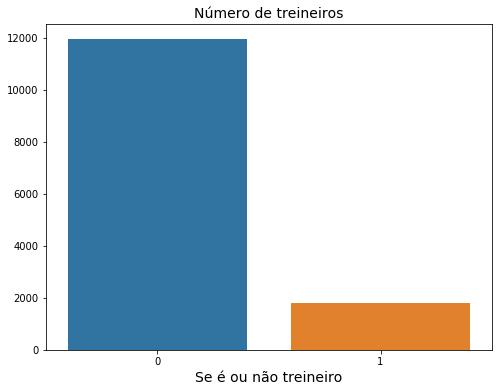

In [122]:
%matplotlib inline

plt.figure(figsize=(8,6))
sns.countplot(x='IN_TREINEIRO',data=treino)
plt.xlabel('Se é ou não treineiro',size=14)
plt.ylabel('')
plt.title('Número de treineiros',size=14)
plt.show()

# 0 - Treineiro
# 1 - Não treineiro

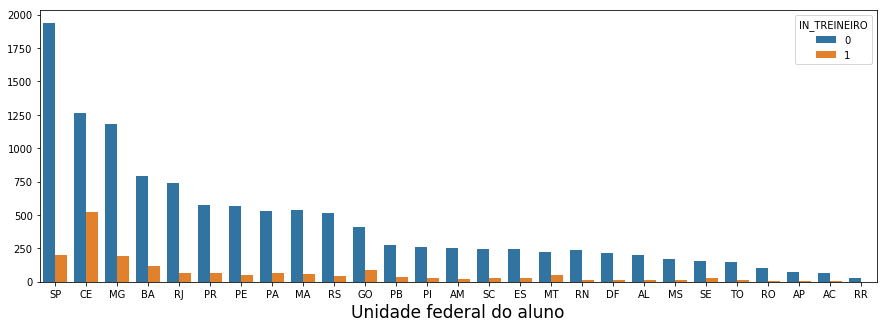

In [123]:
plt.figure(figsize=(15,5))
sns.countplot(x='SG_UF_RESIDENCIA',data=treino,order = treino['SG_UF_RESIDENCIA'].value_counts().index,hue='IN_TREINEIRO')
plt.xlabel('Unidade federal do aluno',size=17)
plt.ylabel('')
plt.show()

#o estado com maior número de treineiros foi o Ceará, seguido de Minas Gerais e São Paulo

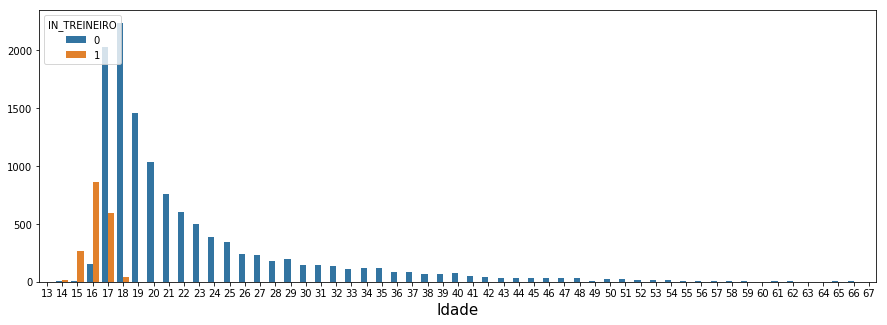

In [124]:
plt.figure(figsize=(15,5))
sns.countplot(x='NU_IDADE',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Idade',size=15)
plt.ylabel('')
plt.show()

#As idades onde predominam os treineiros são as abaixo de 19 anos

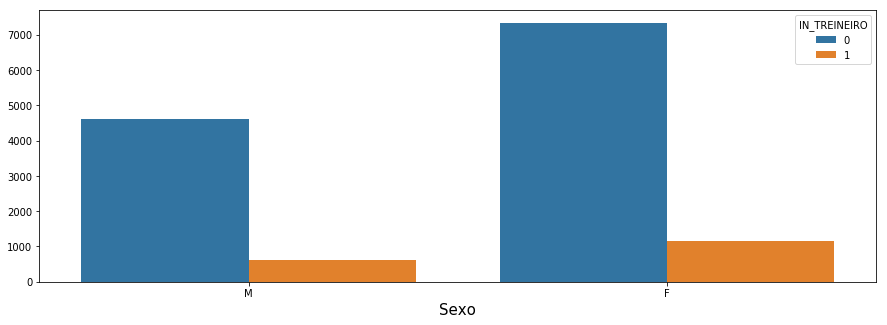

In [125]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_SEXO',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Sexo',size=15)
plt.ylabel('')
plt.show()

#Por sexo, o número de treineiros do sexo feminino é maior do que os do sexo masculino

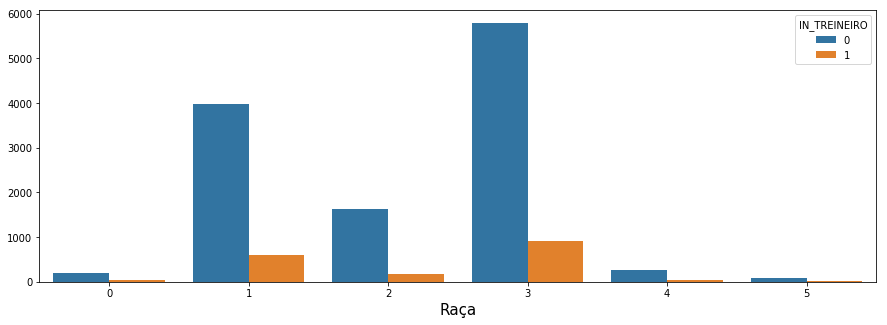

In [126]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_COR_RACA',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Raça',size=15)
plt.ylabel('')
plt.show()

#0 - Não declarado
#1 - Branca
#2 - Preta
#3 - Parda
#4 - Amarela
#5 - Indígena 
#6 - Não dispõe da informação

#A maioria dos treineiros são pardos ou brancos

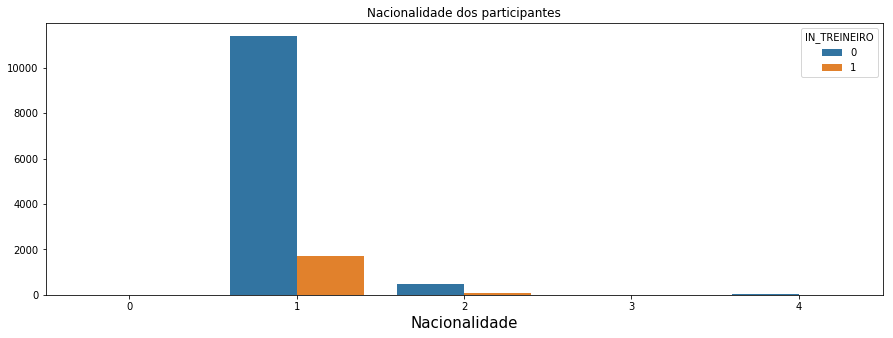

In [127]:
plt.figure(figsize=(15,5))
sns.countplot(x='TP_NACIONALIDADE',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Nacionalidade',size=15)
plt.ylabel('')
plt.title('Nacionalidade dos participantes')
plt.show()

#0 - Não informado
#1 - Brasileiro(a)
#2 - Brasileiro(a) Naturalizado(a)
#3 - Estrangeiro(a)
#4 - Brasileiro(a) Nato(a), nascido(a) no exterior

#A grande parte dos treineiros são brasileiros

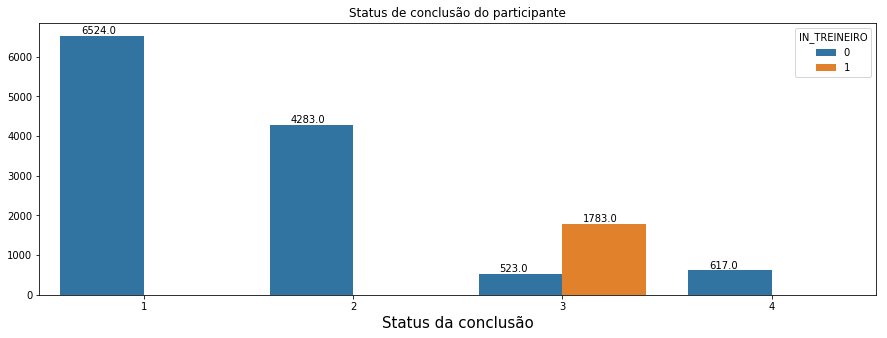

In [128]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ST_CONCLUSAO',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Status da conclusão',size=15)
plt.ylabel('')
plt.title('Status de conclusão do participante')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

#1 - Já concluí o Ensino Médio
#2 - Estou cursando e concluirei o Ensino Médio em 2016
#3 - Estou cursando e concluirei o Ensino Médio após 2016
#4 - Não concluí e não estou cursando o Ensino Médio

#100% dos treineiros ainda não concluiram o ensino médio

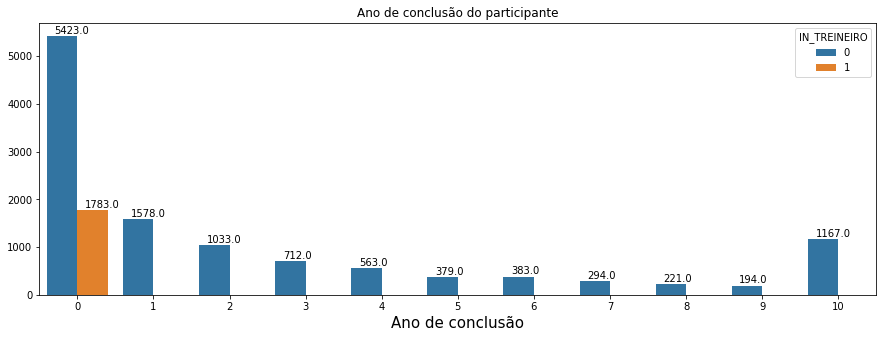

In [129]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ANO_CONCLUIU',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Ano de conclusão',size=15)
plt.ylabel('')
plt.title('Ano de conclusão do participante')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

#0 - Não informado
#1 - 2015
#2 - 2014
#3 - 2013
#4 - 2012
#5 - 2011
#6 - 2010
#7 - 2009
#8 - 2008
#9 - 2007
#10 - Anterior a 2007

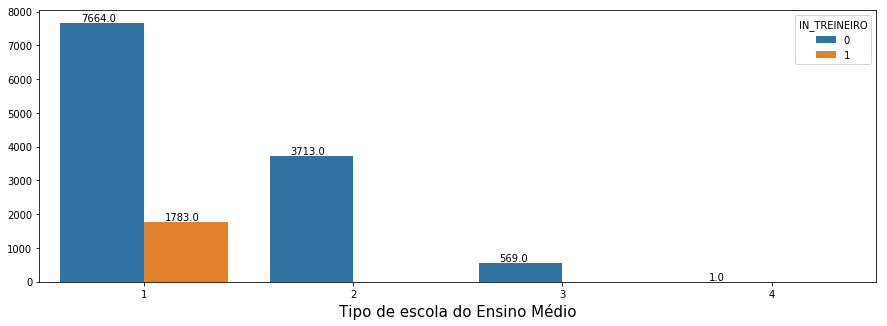

In [130]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_ESCOLA',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Tipo de escola do Ensino Médio',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

#1 - Não Respondeu
#2 - Pública
#3 - Privada
#4 - Exterior

#Os treineiro não responderam o tipo de escola que estão estudando

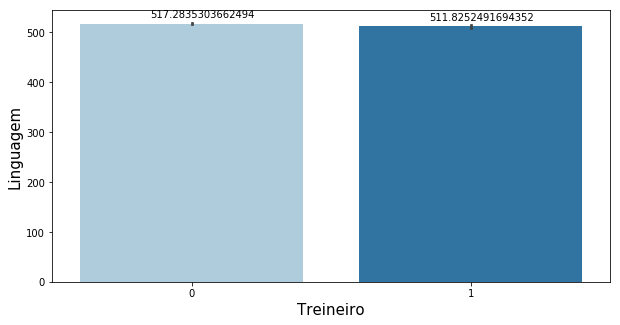

In [131]:
plt.figure(figsize=(10,5))
dx=sns.barplot(x='IN_TREINEIRO',y='NU_NOTA_LC',data=treino,palette='Paired')
plt.xlabel('Treineiro',size=15)
plt.ylabel('Linguagem',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+12))
plt.show()

#A média da nota dos alunos treineiros não parece se diferenciar muito dos que estão realmente fazendo o ENEM.

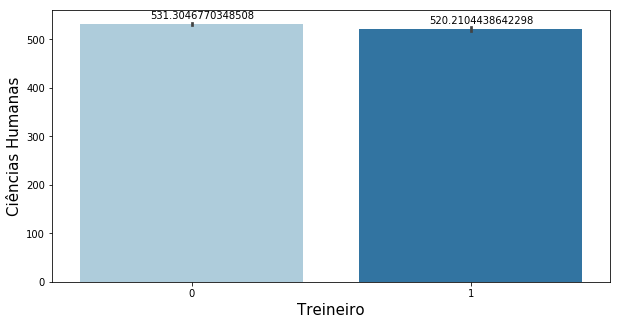

In [132]:
plt.figure(figsize=(10,5))
dx=sns.barplot(x='IN_TREINEIRO',y='NU_NOTA_CH',data=treino,palette='Paired')
plt.xlabel('Treineiro',size=15)
plt.ylabel('Ciências Humanas',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+12))
plt.show()

#A média da nota dos alunos treineiros não parece se diferenciar muito dos que estão realmente fazendo o ENEM.

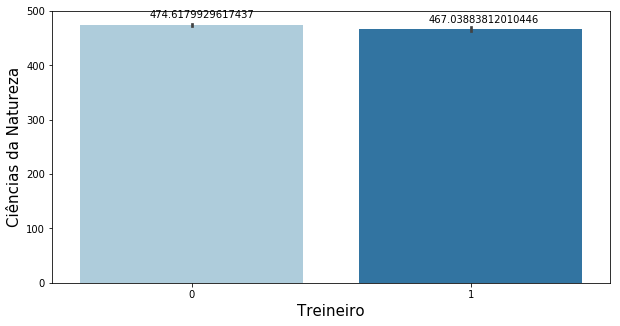

In [133]:
plt.figure(figsize=(10,5))
dx=sns.barplot(x='IN_TREINEIRO',y='NU_NOTA_CN',data=treino,palette='Paired')
plt.xlabel('Treineiro',size=15)
plt.ylabel('Ciências da Natureza',size=15)
plt.title('',size=15)
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+12))
plt.show()

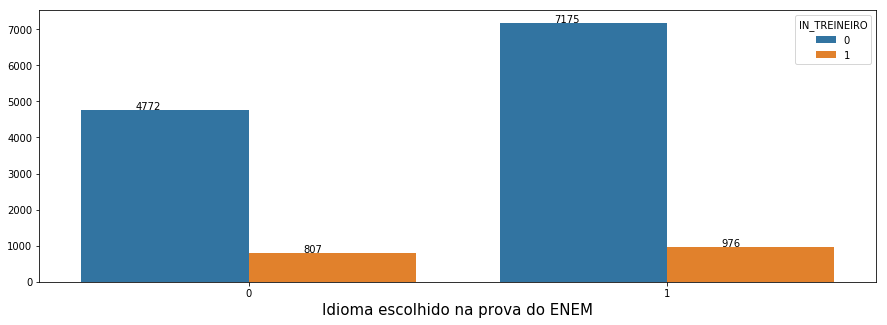

In [134]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='TP_LINGUA',data=treino,hue='IN_TREINEIRO')
plt.xlabel('Idioma escolhido na prova do ENEM',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.13, p.get_height()+15))
plt.show()

#0 -  Inglês
#1 - Espanhol

#A maioria dos treineiros optou pelo idioma espanhol

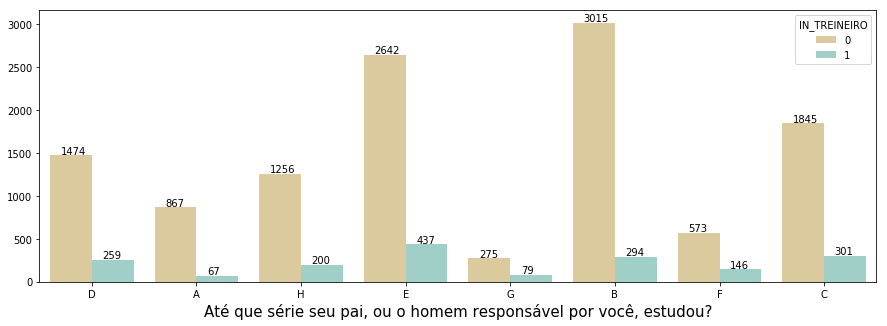

In [135]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q001',data=treino,palette='BrBG',hue='IN_TREINEIRO')
plt.xlabel('Até que série seu pai, ou o homem responsável por você, estudou?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+15))
plt.show()

#A - Nunca estudou.
#B - Não completou a 4ª série/5º ano do Ensino Fundamental.
#C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
#D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
#E - Completou o Ensino Médio, mas não completou a Faculdade.
#F - Completou a Faculdade, mas não completou a Pós-graduação.
#G - Completou a Pós-graduação.
#H - Não sei.

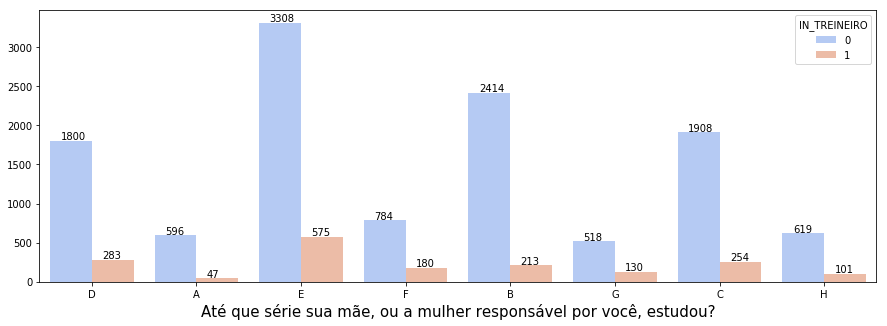

In [136]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q002',data=treino,palette='coolwarm',hue='IN_TREINEIRO')
plt.xlabel('Até que série sua mãe, ou a mulher responsável por você, estudou?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+15))
plt.show()

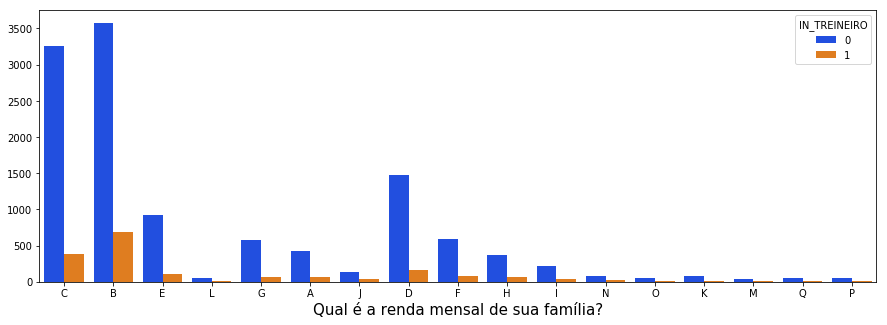

In [137]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q006',data=treino,palette='bright',hue='IN_TREINEIRO')
plt.xlabel('Qual é a renda mensal de sua família?',size=15)
plt.ylabel('')
plt.title('')
plt.show()

#A - Nenhuma renda.
#B - Até R$ 880,00.
#C - De R$ 880,01 até R$ 1.320,00.
#D - De R$ 1.320,01 até R$ 1.760,00.
#E - De R$ 1.760,01 até R$ 2.200,00.
#F - De R$ 2.200,01 até R$ 2.640,00.
#G - De R$ 2.640,01 até R$ 3.520,00.
#H - De R$ 3.520,01 até R$ 4.400,00.
#I - De R$ 4.400,01 até R$ 5.280,00.
#J - De R$ 5.280,01 até R$ 6.160,00.
#K - De R$ 6.160,01 até R$ 7.040,00.
#L - De R$ 7.040,01 até R$ 7.920,00.
#M - De R$ 7.920,01 até R$ 8.800,00.
#N - De R$ 8.800,01 até R$ 10.560,00.
#O - De R$ 10.560,01 até R$ 13.200,00.
#P - De R$ 13.200,01 até R$ 17.600,00.
#Q - Mais de R$ 17.600,00.

#A maioria dos treineiros são da faixa de renda B ,C e D, que são as mais baixas.

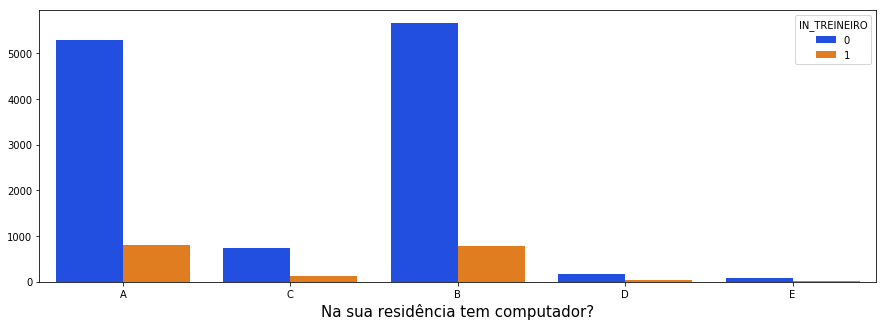

In [138]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q024',data=treino,palette='bright',hue='IN_TREINEIRO')
plt.xlabel('Na sua residência tem computador?',size=15)
plt.ylabel('')
plt.title('')
plt.show()

#A - Não.
#B - Sim, um.
#C - Sim, dois.
#D - Sim, três.
#E - Sim, quatro ou mais.

#A maior parte dos treineiros não possuem computadores em casa ou possuem apenas um PC.

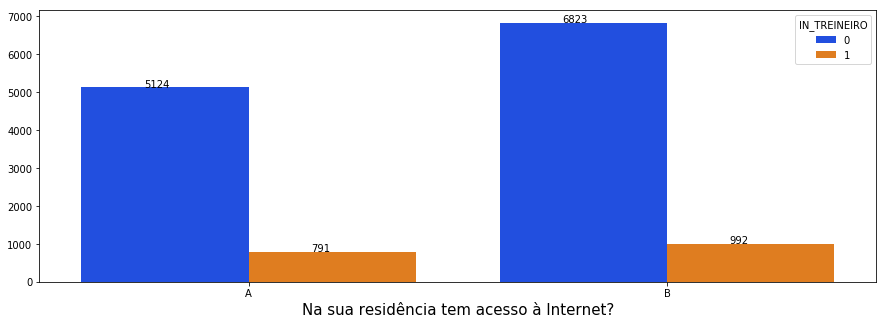

In [139]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q025',data=treino,palette='bright',hue='IN_TREINEIRO')
plt.xlabel('Na sua residência tem acesso à Internet?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+15))
plt.show()

#A - Não.
#B - Sim.

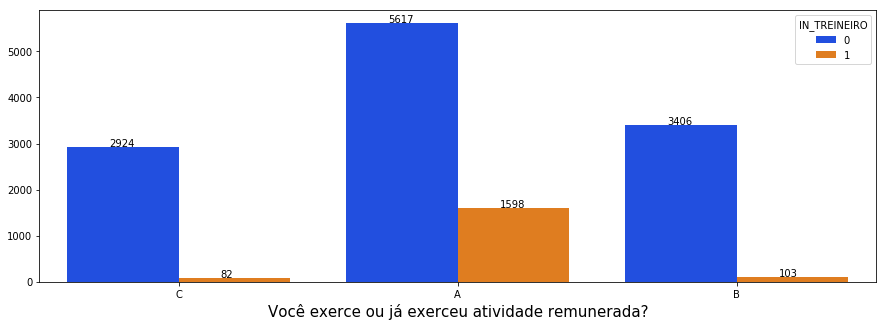

In [140]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q026',data=treino,palette='bright',hue='IN_TREINEIRO')
plt.xlabel('Você exerce ou já exerceu atividade remunerada?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+15))
plt.show()

#A - Não, nunca trabalhei.
#B - Sim, já trabalhei, mas não estou trabalhando.
#C - Sim, estou trabalhando.

#A significativa maioria dos treineiros nunca exerceram uma atividade remunerada (89.62%)

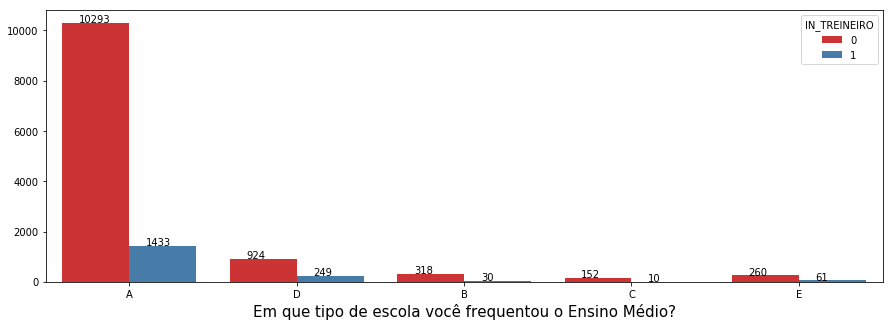

In [141]:
plt.figure(figsize=(15,5))
dx=sns.countplot(x='Q047',data=treino,palette='Set1',hue='IN_TREINEIRO')
plt.xlabel('Em que tipo de escola você frequentou o Ensino Médio?',size=15)
plt.ylabel('')
plt.title('')
for p in dx.patches:
    dx.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+15))
plt.show()

#A	Somente em escola pública.
#B	Parte em escola pública e parte em escola privada sem bolsa de estudo integral.
#C	Parte em escola pública e parte em escola privada com bolsa de estudo integral.
#D	Somente em escola privada sem bolsa de estudo integral.
#E	Somente em escola privada com bolsa de estudo integral.

#Mais de 80% dos treineiros são de escolas públicas

# SELEÇÃO DE FEATURES

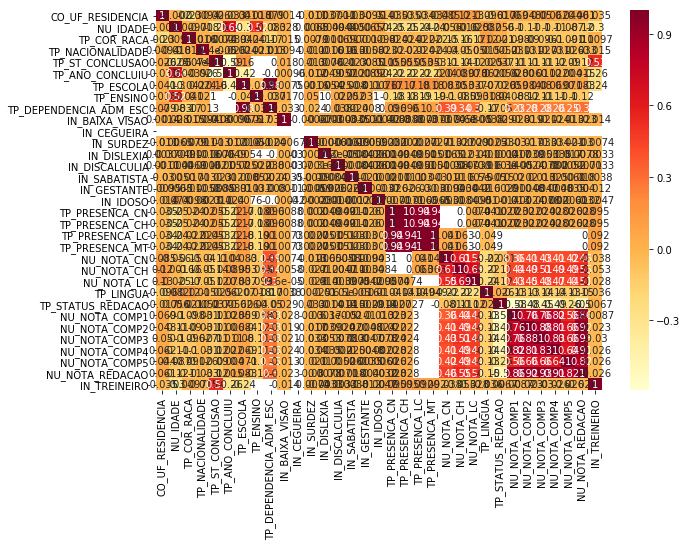

In [142]:
#Assim como o desafio da semana passada vamos escolher as features por correlação
plt.figure(figsize=(10,7))
correlacao2=treino.corr()
sns.heatmap(correlacao2, annot = True, cmap = "YlOrRd")

In [143]:
correlacao=treino.corr()

In [144]:
print(correlacao['IN_TREINEIRO'])

CO_UF_RESIDENCIA         -0.034944
NU_IDADE                 -0.295091
TP_COR_RACA               0.009676
TP_NACIONALIDADE         -0.015179
TP_ST_CONCLUSAO           0.533983
TP_ANO_CONCLUIU          -0.257710
TP_ESCOLA                -0.244562
TP_ENSINO                      NaN
TP_DEPENDENCIA_ADM_ESC         NaN
IN_BAIXA_VISAO           -0.013602
IN_CEGUEIRA                    NaN
IN_SURDEZ                -0.007374
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_SABATISTA              0.003824
IN_GESTANTE              -0.011893
IN_IDOSO                 -0.004663
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_LC            0.092454
TP_PRESENCA_MT            0.092454
NU_NOTA_CN               -0.037874
NU_NOTA_CH               -0.053460
NU_NOTA_LC               -0.028261
TP_LINGUA                -0.036395
TP_STATUS_REDACAO         0.006688
NU_NOTA_COMP1            -0.008709
NU_NOTA_COMP2            -0.023308
NU_NOTA_COMP3       

In [37]:
#por correlação usaremos as colunas 'NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA'
treino2=treino[['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA']]
teste2=teste[['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA']]

In [44]:
#E vamos padronizar a coluna idade em cada uma dos dataset
treino2['NU_IDADE']=(treino2['NU_IDADE'] - treino2['NU_IDADE'].mean())/treino2['NU_IDADE'].std()
teste2['NU_IDADE']=(teste2['NU_IDADE'] - teste2['NU_IDADE'].mean())/teste2['NU_IDADE'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# MODELAGEM E PREVISÃO

In [43]:
#Importando o modelo de regressão logística
from sklearn.linear_model import LogisticRegression

In [48]:
#Aplicando o modelo Logistic Regression

#intanciando e treinando o modelo de regressão logística
AdultLR=LogisticRegression().fit(treino2, classe)

#gerando as previsões
y_pred_lr=AdultLR.predict(teste2)

#visualizando as previsões
print(y_pred_lr)

[0 0 1 ... 0 0 0]


In [55]:
features4=['NU_INSCRICAO','IN_TREINEIRO']

In [56]:
enem_teste2=pd.read_csv("test.csv")
enem_teste2['IN_TREINEIRO']=y_pred_lr
enem_teste2=enem_teste2[features4]
enem_teste2.to_csv('answer.csv',index=False)

# CONCLUSÃO

O score mínimo desse desafio era de 90% e com o modelo de regressão logística consegui o score de 99.649891% e passei no desafio da semana 9 do AceleraDev Codenation.

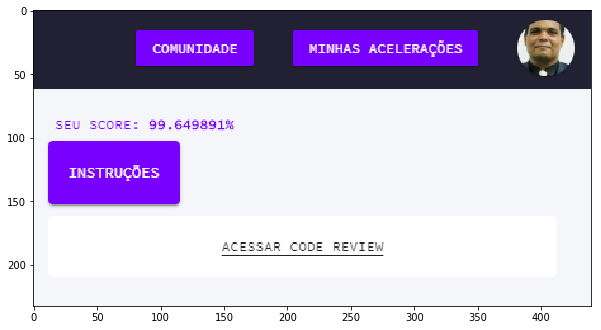

In [97]:
%matplotlib inline
plt.figure(figsize=(10,6))
img = mpimg.imread('score_semana9.png')
imgplot = plt.imshow(img)